<a href="https://colab.research.google.com/github/allnes/age_classifier/blob/master/fcn_count/fcn_700.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TensorFlow 1.x selected.
Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
age_classifier	LICENSE.txt  rcv1.ipynb        summaries
checkpoints	makefile     README.md	       trials
lib		nips2016     requirements.txt  usage.ipynb
From https://github.com/allnes/cnn_graph
 * branch            graph_train -> FETCH_HEAD
Already up to date.
['arr_0', 'arr_1']
(729, 16384)
(729,)
--> Reshape data


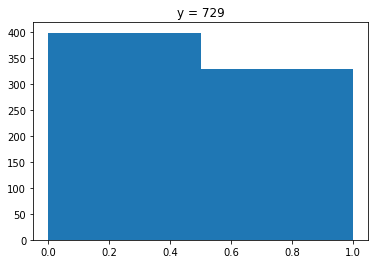

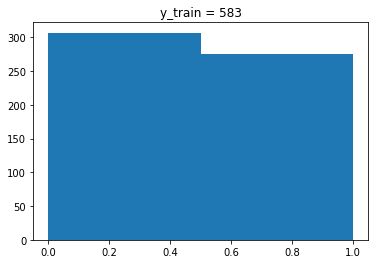

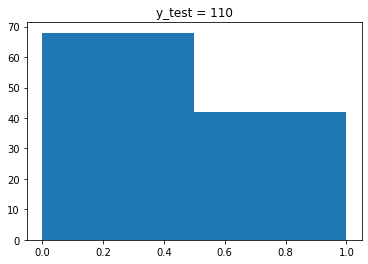

[0 1]
--> Get distance graph
d = |V| = 128, k|V| < |E| = 128452


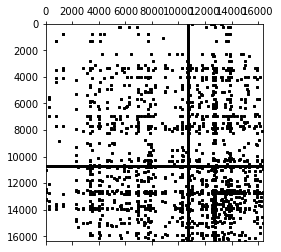

--> Get laplacian matrix


/content/drive/My Drive/DL_DATA_GRAPH/BUILD/cnn_graph/lib/coarsening.py:152: RuntimeWarning: divide by zero encountered in true_divide
  tval = vv[rs+jj] * (1.0/weights[tid] + 1.0/weights[nid])
/content/drive/My Drive/DL_DATA_GRAPH/BUILD/cnn_graph/lib/coarsening.py:152: RuntimeWarning: divide by zero encountered in true_divide
  tval = vv[rs+jj] * (1.0/weights[tid] + 1.0/weights[nid])
/content/drive/My Drive/DL_DATA_GRAPH/BUILD/cnn_graph/lib/coarsening.py:152: RuntimeWarning: divide by zero encountered in true_divide
  tval = vv[rs+jj] * (1.0/weights[tid] + 1.0/weights[nid])


Layer 0: M_0 = |V| = 125696 nodes (109312 added),|E| = 64226 edges
Layer 1: M_1 = |V| = 62848 nodes (46670 added),|E| = 64189 edges
Layer 2: M_2 = |V| = 31424 nodes (15458 added),|E| = 63524 edges
Layer 3: M_3 = |V| = 15712 nodes (0 added),|E| = 62948 edges
(583, 125696)
(36, 125696)
(110, 125696)
NN architecture
  input: M_0 = 125696
  layer 1: cgconv1
    representation: M_0 * F_1 / p_1 = 125696 * 32 / 4 = 1005568
    weights: F_0 * F_1 * K_1 = 1 * 32 * 16 = 512
    biases: M_1 * F_1 = 125696 * 32 = 4022272
  layer 2: cgconv2
    representation: M_1 * F_2 / p_2 = 31424 * 32 / 2 = 502784
    weights: F_1 * F_2 * K_2 = 32 * 32 * 16 = 16384
    biases: M_2 * F_2 = 31424 * 32 = 1005568
  layer 3: fc1
    representation: M_3 = 700
    weights: M_2 * M_3 = 502784 * 700 = 351948800
    biases: M_3 = 700
  layer 4: logits (softmax)
    representation: M_4 = 2
    weights: M_3 * M_4 = 700 * 2 = 1400
    biases: M_4 = 2







Instructions for updating:
Please use `rate` instead of `keep_prob`

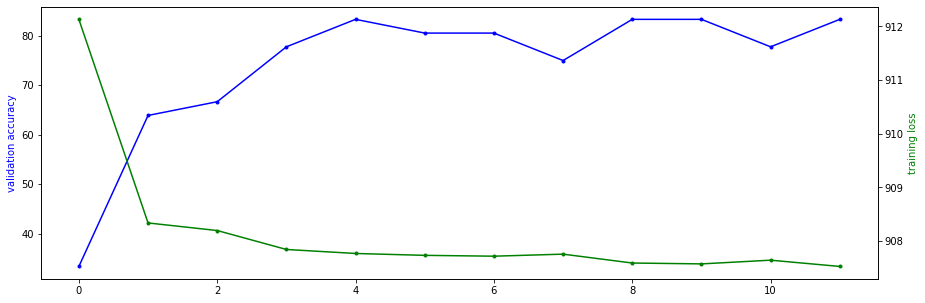

Time per step: 601.49 ms
(110, 125696) (110,)
############ Class 0
(68, 125696)
INFO:tensorflow:Restoring parameters from /content/drive/My Drive/DL_DATA_GRAPH/BUILD/cnn_graph/lib/../checkpoints/demo/model-1166
accuracy: 82.35 (56 / 68), f1 (weighted): 90.32, loss: 8.01e+02
time: 3s (wall 3s)
############ Class 1
(42, 125696)
INFO:tensorflow:Restoring parameters from /content/drive/My Drive/DL_DATA_GRAPH/BUILD/cnn_graph/lib/../checkpoints/demo/model-1166
accuracy: 97.62 (41 / 42), f1 (weighted): 98.80, loss: 7.78e+02
time: 2s (wall 2s)
############ All
INFO:tensorflow:Restoring parameters from /content/drive/My Drive/DL_DATA_GRAPH/BUILD/cnn_graph/lib/../checkpoints/demo/model-1166
accuracy: 88.18 (97 / 110), f1 (weighted): 88.35, loss: 6.93e+02
time: 3s (wall 4s)


In [1]:
%tensorflow_version 1.x

from google.colab import drive
import os

drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/DL_DATA_GRAPH/BUILD/cnn_graph/')
!ls

# !git clone https://github.com/mdeff/cnn_graph
# !git status
# !git fetch
# !git checkout graph_train
!git pull origin graph_train

# classes = { 2, 3, 4, 5, 6, 7, 9 }
%run age_classifier/age_classes_fcn \
  --path_project='/content/drive/My Drive/DL_DATA_GRAPH/' \
  --path_data='NEW/converted_data_resize_875_opencv_128.npz' \
  --zip_size=128 \
  --class_count=2 \
  --fcn_count=700 \

%matplotlib inline